Verimizi alalim

Food 101 verisini kullanacagiz

Veriyi kaggledan dogrudan cekecegiz cunku boyutu 5 gb civarinda. Bunun icin https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb#scrollTo=0HtGf0HEXEa5

Bu linkte yoenrgeleri takip edebilirsiniz

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


Indirme islemi sadece ornek amaclidir bu veriyi simdilik kullanmaycagiz

In [1]:
!kaggle datasets download -d dansbecker/food-101

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Verinin tamami bu ancak biz sadece binary bir isem yapacagimiz icin hazir olarak ayrilmis asagidaki veriyi kullanacagiz. 

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-12-10 16:49:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   116MB/s    in 0.9s    

2021-12-10 16:49:20 (116 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



zip dosyamizdan cikartalim

In [3]:
import zipfile

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

Verimiz klasorler halinde colaba eklenmis oldu. Yerelde calisanlar icinde ayni durum sozkonusu

Gordunuz gibi burdaki problemimiz pizza ve bifteki(steak) ayirt etmek

Ornek olarak kac tane biftek fotograimiz olduguna bakalim

In [4]:
import os
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

Fotograflari inceleyelim

In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:] # remove .DS_store
print(class_names)

['steak']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # hedef klasorlerimizi belirleyelim
  target_folder = target_dir+target_class

  # belirledigimiz dosyadan rastgele fotograflar alacagiz
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Fotograflari matplotlib ile gorsellestirelim
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # fotograflarin boyutunu yazdiralim

  return img

['3822139.jpg']
Image shape: (512, 512, 3)


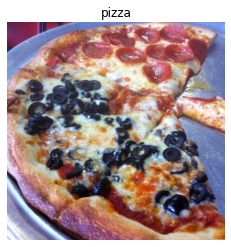

In [7]:
#1 tane pizza fotografina bakalim
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

rastgele birden cok ornege goz atarsak fotograflarin boyutlarinin bazilarinin farkli oldugunu  gorebilirsiniz

In [8]:
import tensorflow as tf
tf.constant(img) #fotografi bu sekilde tensorlere cevirecegiz

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 67,  27,  64],
        [ 68,  28,  65],
        [ 70,  30,  67],
        ...,
        [107, 137, 227],
        [101, 131, 221],
        [ 99, 129, 219]],

       [[ 75,  35,  72],
        [ 75,  35,  72],
        [ 77,  35,  73],
        ...,
        [107, 137, 227],
        [111, 141, 231],
        [115, 145, 235]],

       [[ 84,  42,  82],
        [ 86,  41,  80],
        [ 86,  41,  80],
        ...,
        [110, 141, 231],
        [113, 143, 233],
        [116, 146, 236]],

       ...,

       [[243, 252, 251],
        [237, 246, 251],
        [232, 239, 255],
        ...,
        [179,  97,  37],
        [179,  97,  37],
        [178,  96,  38]],

       [[251, 255, 253],
        [246, 252, 250],
        [242, 250, 253],
        ...,
        [196, 122,  59],
        [196, 120,  58],
        [195, 119,  57]],

       [[248, 253, 246],
        [246, 253, 246],
        [246, 255, 252],
        ...,
        [206, 135,  7

In [9]:
img.shape #genislik,yukseklik,renk kanali seklinden doner

(512, 512, 3)

Bastan sona bir ornek

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



#Tum verimizi 0-1 arasina sikistiralim( goruntu pixel degerlerimiz 0-255 arasinda oldugu icin)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


#klasorlerimizi tanimlayalim
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# fotograflarimizi klasorden alalim veonlar batch lere cevirelim
#batch parca yigin anlamindadir verimizi yiginlar halinde egitime sokariz
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), #tum fotograflarimizi ayni boyuta getirmek cin bu parametreyi kullaniriz
                                               class_mode="binary", #binary yani ikili bir problemle ugrasacagiz
                                               seed=42)

#test veya validation  kumesi icinde aynisini yapiyoruz
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model 
model_1 = tf.keras.models.Sequential([
  
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

#MaxPool ve Conv Katmanlarini ileride gorecegiz

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 266ms/step - loss: 0.6446 - accuracy: 0.6233 - val_loss: 0.5581 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4924 - accuracy: 0.7687 - val_loss: 0.3902 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 11s 241ms/step - loss: 0.4285 - accuracy: 0.8180 - val_loss: 0.3808 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 12s 253ms/step - loss: 0.3735 - accuracy: 0.8467 - val_loss: 0.3544 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 12s 259ms/step - loss: 0.3444 - accuracy: 0.8513 - val_loss: 0.3301 - val_accuracy: 0.8720


train_datagen.flow_from_directory ()kullandigimiz zaman verilerimizi otomatik olarak labellarnir bu yuzden fit ederken label tanimlamaya gerek kalmaz

In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

https://poloclub.github.io/cnn-explainer/
cnnlerin nasil caistigini anlatan guzel bir site

CNN degilde onceki modellerde kullandigimiz bir mimariyi kullanalim

In [12]:
# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                         
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 229ms/step - loss: 0.7735 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 237ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 237ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 227ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


cok kotu bir performans gosterdi biraz CNN nin gucunu gormus olduk

In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


parametre sayilarina baktigimizda CNN den 20 kkati kadar fazla parametreye sahip oldugunu goruyoruz

CNN olmayan modelimizi biraz daha gelistirmeye calisalim

In [14]:
# Create the model 
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"), #katmanlari buyutelim
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                            
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 229ms/step - loss: 2.1870 - accuracy: 0.6627 - val_loss: 0.6573 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 1.1672 - accuracy: 0.6807 - val_loss: 0.5002 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.7030 - accuracy: 0.7180 - val_loss: 0.4795 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4730 - accuracy: 0.7887 - val_loss: 1.1785 - val_accuracy: 0.5240
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6692 - accuracy: 0.7420 - val_loss: 0.4949 - val_accuracy: 0.7560


In [15]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


model_1 CNN yapisina sahip  Total params: 31,101

model_3 CNN degil Total params: 15,073,201

Performans olarak hala model_1 daha iyi performans sergiliyor

# Detayli

1. Veriyi incelemek .
2. Preprocess (Veriyi model icin hazirlamak scaling/normalization).
3. Modeli olusturmak. (basit halde)
4. Modeli fit etmek
5. Modeli degerlendirmek (Evaluate the model)
6. Farkli parametreler ile modeli gelistirmek. 

**1. Veriyi incelemek** 

['368170.jpg']
Image shape: (384, 512, 3)
['709947.jpg']
Image shape: (509, 512, 3)


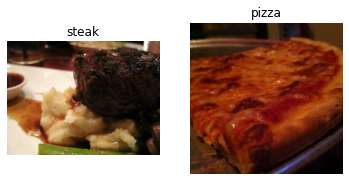

In [16]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

**2. Preprocess**

In [17]:
#verimizi tanimlayalim
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Simdi modelimizi yiginlar(batch) haline getirecegiz. Batch, verimizin alt kumesi gibidir. Modelimize tum veriye tek seferde degilde batchler halinde gondeririz. Bu bize islem hafiflemesi ve modelin daha rahat patternleri gormesini saglar.

Batch buyuklugunu 32 olarak belirleyecegiz. Genel olarak 32 kullanilir sebebi verimli olmasidir.


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#tum piksel degerlerini 0-1 arasina sikistiracagiz---- normalization
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

verilerimizi batchler haline getirelim

In [19]:
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               target_size=(224, 224), #(height, width)
                                               class_mode="binary", 
                                               batch_size=32) 


test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


batchlerden orneklere bakalım

In [20]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

kac batch imiz var

In [21]:
len(train_data)

47

cunku

In [22]:
1500/32

46.875

ilk 2 fotografa tekrar bakalim

In [23]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

goruldugu gibi tum piksel degerleri 0-1 arasinda

In [24]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

binary bir siniflandirma yapcagimiz icin label larimiz 0 veya 1 degerlerinde bunlardan bir tanesi pizzayi digeri ise steaki(biftek) ifade ediyor

**3. Modeli olusturma** (Basit)

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

En basit haliyle bir model yapalim,daha sonra gelistirmebiliriz. Model karmasikligi da sorunlar yaratabilir.

In [26]:
model_4 = Sequential([
          Conv2D(filters=10, #kac tane filtre kullanilacagini belirler
                 #cok filtre sayisi daha complex modellere olsumasini saglar
                 kernel_size= 3,  #filtrenin shapini belirler
                 #dusuk kernel size daha kucuk oznitelikleri(features) ogrenir,yuksek ise daha buyuk
                 strides= 1, #filtre uygulanirken kac pixel kaydirilacagini belirler

                 padding= "valid", #input ile ilgili daha fazla bilgi kalmasi icin same bu sekilde inputshape = outputshape olurs
                                         #katmanlar boyunca shape i azaltmak icin `valid` kullanilir
                 activation= "relu",
                 input_shape= (224,224,3)),
          Conv2D(10,3,activation="relu"),
          Conv2D(10,3,activation="relu"),
          Flatten(),
          Dense(1,activation="sigmoid")
])

https://poloclub.github.io/cnn-explainer/  

bu siteden CNN nasil calisir daha guzel anlayabilirsiniz.

In [27]:
#compile the model
model_4.compile(loss= "binary_crossentropy",
                optimizer= Adam(),
                metrics =["accuracy"])

In [28]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


**fit the model**

In [29]:
history_4 = model_4.fit( train_data,
                        epochs = 5 ,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 266ms/step - loss: 0.8311 - accuracy: 0.6087 - val_loss: 0.4614 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 12s 252ms/step - loss: 0.4590 - accuracy: 0.7953 - val_loss: 0.4816 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 12s 253ms/step - loss: 0.3465 - accuracy: 0.8567 - val_loss: 0.3417 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 13s 268ms/step - loss: 0.1896 - accuracy: 0.9400 - val_loss: 0.3518 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 12s 256ms/step - loss: 0.0814 - accuracy: 0.9833 - val_loss: 0.4072 - val_accuracy: 0.8180


**Evaluating our model**

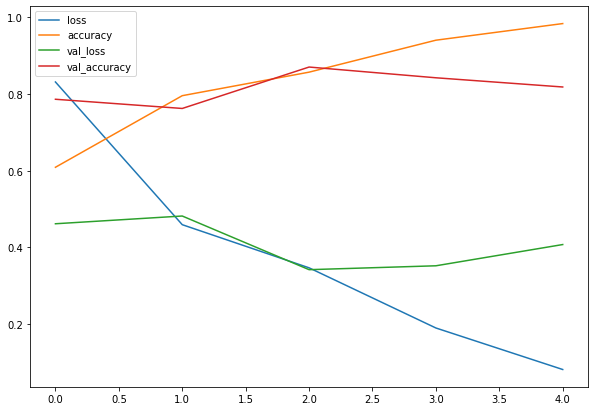

In [30]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize= (10,7))

biraz kafa karistirici oldu bunlari ayiralim daha iyi gormek icin

In [31]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

#plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  
  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


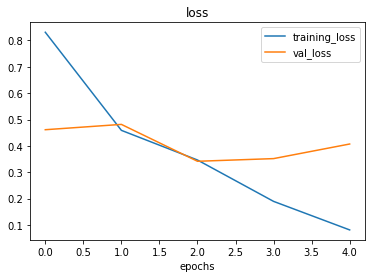

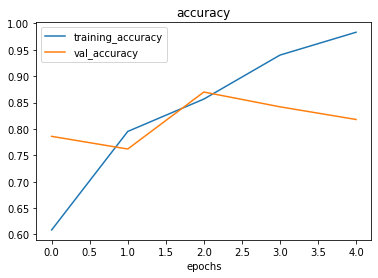

In [32]:
plot_loss_curves(history_4)

validation ile training degerlerimiz bir noktada ayriliyor ise yani training performansi artiyor fakat validation uzerinde performans artmiyorsa modelimizi  asiri ogreniyor demektir (**overfitting**)

**Model Parametrelerini ayarlamak**

Overfitting olmasini tesvik eden seyler: 
* Conv layer sayisini arttirmak yani modeli derinlestirmek.
* Filtre sayisini arttirmak.
* Yeni bir katman eklemek.

Overfitting'i azaltan seyler: 
* Data Augmentation (Veriyi Büyütme)
* Regularization Layers (MaxPool2d gibi katmanlar)
* Daha fazla veri.

Overfittingi azaltmaya genel anlamada regularization da denir.

In [33]:
#Create the model
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), #conv katmanindaki oznitelik(features)larin sadece en onemlilerini alir
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [34]:
# Compile model 
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [35]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 232ms/step - loss: 0.6093 - accuracy: 0.6593 - val_loss: 0.5032 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4505 - accuracy: 0.7993 - val_loss: 0.3745 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4139 - accuracy: 0.8173 - val_loss: 0.3256 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3929 - accuracy: 0.8233 - val_loss: 0.4213 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3733 - accuracy: 0.8373 - val_loss: 0.3121 - val_accuracy: 0.8780


In [36]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [37]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


model_4 vs _model_5  baktigimizda parametre sayisi ciddi anlamda dustmus oldu

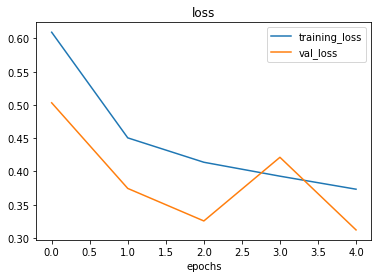

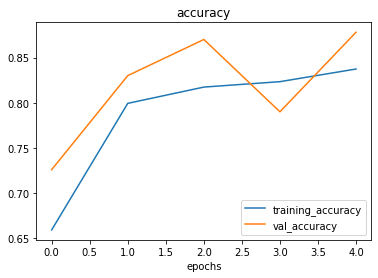

In [38]:
plot_loss_curves(history_5)

**Data Augmentation**

https://medium.com/novaresearchlab/veri-artırımı-data-augmentation-fcc839da556b

In [39]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # fotografi dondurur
                                             shear_range=0.2, # kirpma
                                             zoom_range=0.2, # zoom 
                                             width_shift_range=0.2, # yatay kaydirma
                                             height_shift_range=0.2, # dikey kaydirma
                                             horizontal_flip=True) # yatayda dondurme

# data augmentation olmadan veri
train_datagen = ImageDataGenerator(rescale=1/255.) 
test_datagen = ImageDataGenerator(rescale=1/255.)

In [40]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) 

#non-augmented data 
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) 

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [41]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() 

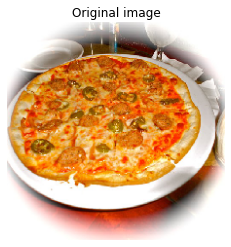

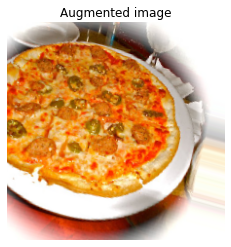

In [42]:
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Simdi yaptigimiz data augmentation isleminin  model uzerinde gorelim

In [43]:
 #create the model
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, #burada desiklik yaptiik
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 576ms/step - loss: 0.7226 - accuracy: 0.5247 - val_loss: 0.6876 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 27s 569ms/step - loss: 0.6877 - accuracy: 0.5320 - val_loss: 0.6565 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 27s 571ms/step - loss: 0.6832 - accuracy: 0.6513 - val_loss: 0.6445 - val_accuracy: 0.5740
Epoch 4/5
47/47 [==============================] - 26s 560ms/step - loss: 0.6498 - accuracy: 0.6600 - val_loss: 0.5242 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 26s 552ms/step - loss: 0.6055 - accuracy: 0.6867 - val_loss: 0.4920 - val_accuracy: 0.7700


epochların daha uzun sürmesinin sebebi bilgisayarın veriyi aynı zamanda arttırmak için çeşitli işlemler(kendi tanımladığımız) yapmasıdır

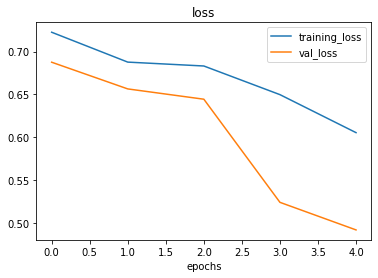

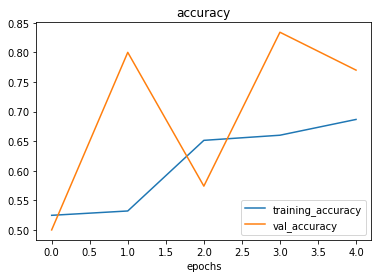

In [44]:
plot_loss_curves(history_6)

egitim verimizi bu seferde karistirarak ayni modeli tekrar deneyelim ve sonmuclari inceleyelim

In [47]:
print("Augmented training images:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) #burayi True yaptik


Augmented training images:
Found 1500 images belonging to 2 classes.


In [48]:
 #create the model
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, #burada desiklik yaptiik
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6460 - accuracy: 0.6347 - val_loss: 0.5580 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 25s 541ms/step - loss: 0.5424 - accuracy: 0.7200 - val_loss: 0.3845 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 25s 540ms/step - loss: 0.4814 - accuracy: 0.7807 - val_loss: 0.3632 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 26s 544ms/step - loss: 0.4611 - accuracy: 0.7893 - val_loss: 0.3778 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 25s 541ms/step - loss: 0.4464 - accuracy: 0.7893 - val_loss: 0.3344 - val_accuracy: 0.8500


loss ve acc degerlerine bakarsak veriyi random sekilde karistirmanin onemini gorebiliriz. boylelikler model ogrenirken once bir classi ogrenip sonra diger classi ogrenmek yerine ikisini karisik sekilde ogrenmesini saglariz.

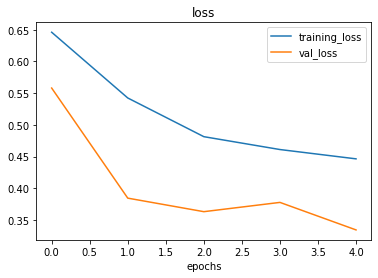

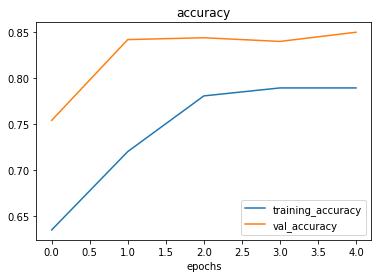

In [49]:
plot_loss_curves(history_7)

Model performansini gelistirmek icin baska neler yapabilecegimize bakalim. 

* Katman sayisini arttirmak(Conv2D veya MaxPool2D olabilir)
* Convolution katmanindaki filtre sayisini arttirmak.(10, 32, 64 gibi)
* Daha fazla epochta egitmek.
* Learning rate degerini daha ideal secmek.
* Daha fazla veri kullanmak.
* Transfer learning kullanmak.

### Baska kaynaktan fotograf ile tahmin yapmak

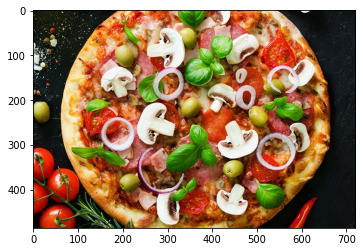

In [59]:
import urllib.request
import matplotlib.pyplot as plt

from PIL import Image
#link ile ekledik 
urllib.request.urlretrieve(
  'https://ykv.s3.eu-central-1.amazonaws.com/img/tarif/mgt/ykvmayiswebsite26.jpg',
   "pizza.jpg")
  
img = mpimg.imread("pizza.jpg")
plt.imshow(img)

In [60]:
img.shape

(486, 720, 3)

fotografi modele tahmin icin vermeden once modelin onu kabul edebilecegi sekil yani modelin egitildigi formata getirmemeiz gerekir.

In [62]:
def load_and_prep_image(filename, img_shape=224):
  #hangi dizinden fotografi alacagimiz
  img = tf.io.read_file(filename)
  #fotografi tensore cevirmek icin
  img = tf.image.decode_image(img, channels=3)
  #fotografin shape yani boyutunu modele uygun duzenlemek icin
  img = tf.image.resize(img, size = [img_shape, img_shape])
  #0-1 arasinda yeni degerler..
  img = img/255.
  return img

In [63]:
pizza = load_and_prep_image("pizza.jpg")
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.04900398, 0.0642507 , 0.04175483],
        [0.0527661 , 0.07237395, 0.04492297],
        [0.07674257, 0.08850727, 0.05075593],
        ...,
        [0.0461582 , 0.06604656, 0.06422604],
        [0.05253654, 0.06570146, 0.06177989],
        [0.0527109 , 0.06923779, 0.07189844]],

       [[0.05288678, 0.07777799, 0.04854504],
        [0.06792717, 0.09145658, 0.0522409 ],
        [0.07226765, 0.08878738, 0.04406512],
        ...,
        [0.04809174, 0.06480978, 0.06401337],
        [0.05964687, 0.07281179, 0.06889022],
        [0.0713497 , 0.09487911, 0.0940385 ]],

       [[0.07087147, 0.10113796, 0.05921806],
        [0.04872573, 0.07225514, 0.03303945],
        [0.06350978, 0.08157701, 0.03661527],
        ...,
        [0.05111856, 0.06680483, 0.0707264 ],
        [0.04189511, 0.05758138, 0.05365982],
        [0.08939472, 0.1059216 , 0.10942286]],

       ...,

       [[0.01517546, 0.0335659 , 0.01940588],
        [0.01

In [65]:
model_7.predict(tf.expand_dims(pizza,axis=0))

array([[0.18180607]], dtype=float32)

hangi sinifa ait olduguna dair bir olasilik dondu 

0 a yakin olmasi onun pizza olma olasiligi
1 e yakin olmasi ise steak(biftek) olma olasiligidir